# ISR Jet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import glob
import uproot

from scipy.stats import pearsonr

import os
import sys
sys.path.append("../code")
from preprocess import read_tsv, fileDir, yr_short, triggers
from plotting import varEvolution, massPlane, normHist2d
from eventDisplays import truthJetMatch, twoValidPairings

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
physicsSample = 'SMNR'
run_one = False
trigger ='2016_triggers'

In [4]:
fDir = "../data/{}_PFlow/".format(physicsSample)
if run_one:
    fName = "files/df_f_0.22_000001.h5" # for lower stats
else:
    fName = "files/df_f_0.22_00*.h5"

In [5]:
# df = pd.read_hdf("../data/SMNR-MAR2019-Prod_PFlow/",key='df')

In [6]:
myFiles = fDir + fName
dfs = []

for i, myFile in enumerate(glob.glob(myFiles)):

    print('{}. {}'.format(i+1,myFile))
    
    
    if myFile == "../data/SMNR_PFlow/files/df_f_0.22_000008.h5":
        continue
    
    df = pd.read_hdf(myFile,key='df')
    loadMask = df.fourGoodJets & (df.nbtags >= 4) & df[trigger]
    dfs.append(df.loc[loadMask,df.columns])
    
miniNtuple = pd.concat(dfs)

1. ../data/SMNR_PFlow/files/df_f_0.22_000009.h5
2. ../data/SMNR_PFlow/files/df_f_0.22_000018.h5
3. ../data/SMNR_PFlow/files/df_f_0.22_000010.h5
4. ../data/SMNR_PFlow/files/df_f_0.22_000005.h5
5. ../data/SMNR_PFlow/files/df_f_0.22_000002.h5
6. ../data/SMNR_PFlow/files/df_f_0.22_000004.h5
7. ../data/SMNR_PFlow/files/df_f_0.22_000007.h5
8. ../data/SMNR_PFlow/files/df_f_0.22_000012.h5
9. ../data/SMNR_PFlow/files/df_f_0.22_000017.h5
10. ../data/SMNR_PFlow/files/df_f_0.22_000016.h5
11. ../data/SMNR_PFlow/files/df_f_0.22_000014.h5
12. ../data/SMNR_PFlow/files/df_f_0.22_000003.h5
13. ../data/SMNR_PFlow/files/df_f_0.22_000008.h5
14. ../data/SMNR_PFlow/files/df_f_0.22_000001.h5
15. ../data/SMNR_PFlow/files/df_f_0.22_000011.h5
16. ../data/SMNR_PFlow/files/df_f_0.22_000013.h5
17. ../data/SMNR_PFlow/files/df_f_0.22_000015.h5
18. ../data/SMNR_PFlow/files/df_f_0.22_000006.h5


In [7]:
miniNtuple = pd.concat(dfs)

In [8]:
triggerText = trigger.replace("_"," ")

In [12]:
figDir = "../figures/SMNR_16/2016_triggers/"

### Truth version

In [10]:
miniNtuple['lead_non_truth_matched_pt'] = 0 

for ievt, indices in miniNtuple.loc[miniNtuple.MDR,['b{}_jidx'.format(i) for i in range(4)]].iterrows():
    
    if miniNtuple.loc[ievt,'nresolvedJets'] == 4:
        continue
    
    miniNtuple.loc[ievt,'lead_non_truth_matched_pt'] = [pt for i, pt in enumerate(miniNtuple.loc[ievt,'resolvedJets_pt']) \
                                             if i not in list(indices)][0]   

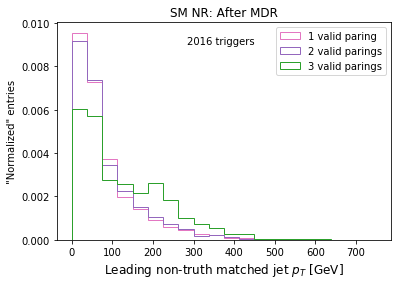

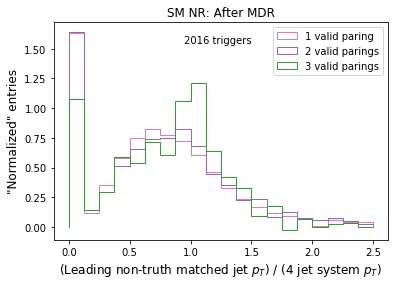

In [17]:
for nPairs,c in zip([1,2,3],['C6','C4','C2']):

    mask = (miniNtuple.nValidPairs == nPairs)
    label = '{} valid paring{}'.format(nPairs,'' if nPairs == 1 else 's')

    plt.hist(miniNtuple.loc[mask,'lead_non_truth_matched_pt'],
             bins=20, range=(0,750), label=label,
             color=c, histtype='step', density=True,
             weights=miniNtuple.loc[mask,'mcEventWeight'])

ylim = plt.ylim()
plt.text(450,0.9*ylim[1],triggerText,horizontalalignment='right')
    
plt.xlabel('Leading non-truth matched jet $p_T$ [GeV]',fontsize=12)
plt.ylabel('"Normalized" entries')
plt.legend()
plt.title('SM NR: After MDR')  
plt.savefig('{}/MDR_lead_nonTruthMatchedJet_pt.pdf'.format(figDir))

plt.figure()
for nPairs,c in zip([1,2,3],['C6','C4','C2']):

    mask_pi = (miniNtuple.nValidPairs == nPairs)
    label = '{} valid paring{}'.format(nPairs,'' if nPairs == 1 else 's')

    plt.hist(miniNtuple.loc[mask_pi,'lead_non_truth_matched_pt'] / miniNtuple.loc[mask_pi,'HCs_pt'],
             bins=20, range=(0,2.5), label=label,
             color=c, histtype='step', density=True,
             weights=miniNtuple.loc[mask_pi,'mc_sf'])

ylim = plt.ylim()
plt.text(1.5,0.9*ylim[1],triggerText,horizontalalignment='right')
    
plt.xlabel('(Leading non-truth matched jet $p_T$) / (4 jet system $p_T$)',fontsize=12)
plt.ylabel('"Normalized" entries',fontsize=12)
plt.legend()
plt.title('SM NR: After MDR')  
plt.savefig('{}/MDR_lead_nonTruthMatchedJet_pt_over_HC_pt.pdf'.format(figDir))

plt.show()


### Reco version

In [19]:
miniNtuple['lead_nonSel_pt'] = 0 

for ievt, indices in miniNtuple.loc[miniNtuple.MDR,['j{}_idx'.format(i) for i in range(4)]].iterrows():

    if miniNtuple.loc[ievt,'nresolvedJets'] == 4:
        continue

    miniNtuple.loc[ievt,'lead_nonSel_pt'] = [pt for i, pt in enumerate(miniNtuple.loc[ievt,'resolvedJets_pt']) \
                                             if i not in list(indices)][0] 

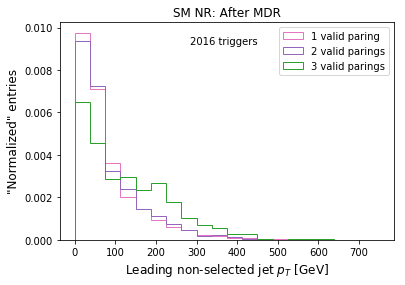

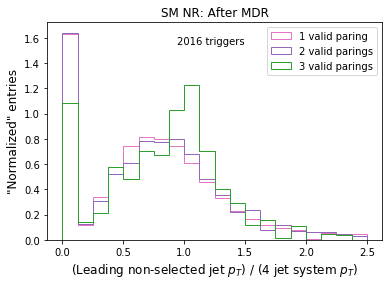

In [21]:
plt.figure()
for nPairs,c in zip([1,2,3],['C6','C4','C2']):

    mask_pi = (miniNtuple.nValidPairs == nPairs)
    label = '{} valid paring{}'.format(nPairs,'' if nPairs == 1 else 's')

    plt.hist(miniNtuple.loc[mask_pi,'lead_nonSel_pt'],
             bins=20, range=(0,750), label=label,
             color=c, histtype='step', density=True,
             weights=miniNtuple.loc[mask_pi,'mc_sf'])

ylim = plt.ylim()
plt.text(450,0.9*ylim[1],triggerText,horizontalalignment='right')

plt.xlabel('Leading non-selected jet $p_T$ [GeV]',fontsize=12)
plt.ylabel('"Normalized" entries',fontsize=12)
plt.legend()
plt.title('SM NR: After MDR') 
plt.savefig('{}/MDR_lead_nonSelJet_pt.pdf'.format(figDir))


plt.figure()
for nPairs,c in zip([1,2,3],['C6','C4','C2']):

    mask_pi = (miniNtuple.nValidPairs == nPairs)
    label = '{} valid paring{}'.format(nPairs,'' if nPairs == 1 else 's')

    plt.hist(miniNtuple.loc[mask_pi,'lead_nonSel_pt'] / miniNtuple.loc[mask_pi,'HCs_pt'],
             bins=20, range=(0,2.5), label=label,
             color=c, histtype='step', density=True,
             weights=miniNtuple.loc[mask_pi,'mc_sf'])

ylim = plt.ylim()
plt.text(1.5,0.9*ylim[1],triggerText,horizontalalignment='right')
    
plt.xlabel('(Leading non-selected jet $p_T$) / (4 jet system $p_T$)',fontsize=12)
plt.ylabel('"Normalized" entries',fontsize=12)
plt.legend()
plt.title('SM NR: After MDR')  
plt.savefig('{}/MDR_lead_nonSelJet_pt_over_HC_pt.pdf'.format(figDir))

plt.show()

In [ ]:
miniNtuple[['lead_non_truth_matched_pt','lead_nonSel_pt']].head()

In [ ]:
cols = ['j{}_idx'.format(i) for i in range(4)]
cols += ['resolvedJets_pt','resolvedJets_eta','resolvedJets_phi']
cols += ['truth_pt','truth_eta','truth_phi','truth_pdg']

In [ ]:
miniNtuple.loc[564942,cols]